In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../"))

# Any results you write to the current directory are saved as output.

['task1', 'requirements.txt', 'submitToKaggle.sh', 'test.csv', 'downloadCompetitionData.sh', 'README.md', 'task2', '.gitignore', 'train.csv', '.ipynb_checkpoints', '.git', '.circleci', 'gender_submission.csv']


In [2]:
data=pd.read_csv('../train.csv')
test_data = pd.read_csv('../test.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# посмотрим, где есть пропущенные значения
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Некоторые значения о возрасте отсутствуют, надо их как-то заполнить, но заполнять нулями не хочется. Давайте заполним просто средним значением возраста (что, я думаю, тоже не совсем верно)

Некоторые значения Cabin и Embarked тоже не заполнены.

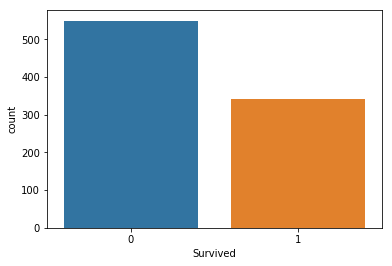

In [6]:
# посомтрим, сколько людей выжило
sns.countplot('Survived',data=data)
plt.show()

In [7]:
# Теперь посмотрим, сколько выжило женщин/мужчин
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

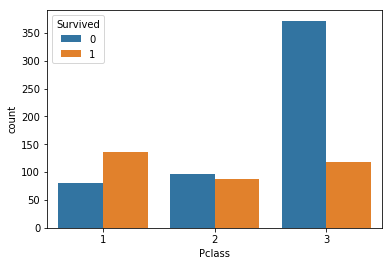

In [8]:
# Далее надо все-таки выяснить, можно ли за деньги купить себе жизнь
# Построим график того, сколько людей из какого класса выжило
sns.countplot('Pclass',hue='Survived',data=data)
plt.show()

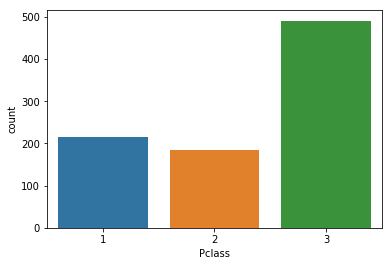

In [9]:
# Исходя из верхнего графика видно, что выживших пассажиров первого класса больше, нежели погибших.
# Давайте посмотрим, сколько пассажиров какого класса было и найдем процент выживших среди каждого класса
sns.countplot('Pclass',data=data)
plt.show()

In [10]:
# Посмотрим на процентное соотношение выживших и умерших по каждому классу
data.groupby(['Pclass','Survived'])['Survived'].count()/data.groupby(['Pclass']).count()['Survived']

Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

Посмотрев на таблицу выше, приходим к печальному (или нет, для кого как) выводу: за деньги все же можно купить себе жизнь. Значит, все-таки пассажиры первого класса были "важнее", чем третьего:(
Цена на билет значения не имеет, но имеет значение класс

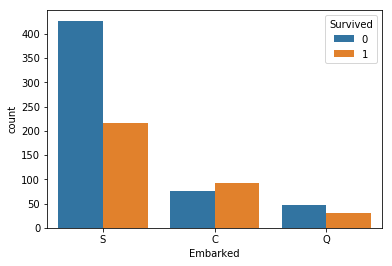

In [11]:
# Теперь давайте посмотрим, сколько людей в каком порту село и сколько из них выжило
sns.countplot('Embarked',hue='Survived',data=data)
plt.show()

Отсюда видно, что больше всех людей село в порте S и выжило оттуда же, но видно забавную закономерность: количество выживших, севших в порте C больше(в процентном соотношении), чем умерших:

In [12]:
data.groupby(['Embarked','Survived'])['Survived'].count()/data.groupby(['Embarked']).count()['Survived']

Embarked  Survived
C         0           0.446429
          1           0.553571
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: Survived, dtype: float64

Кажется, где-то уже было такое
Давайте посмотрим, связана ли такая высокая выживаемость с полом или классом:

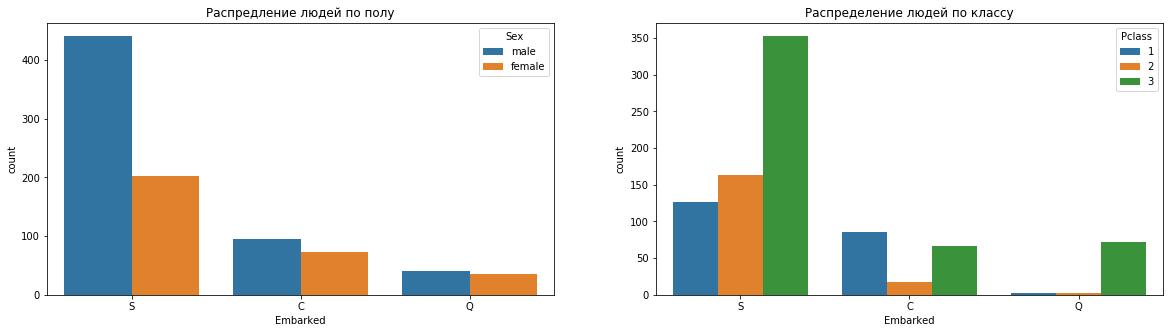

In [13]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0])
ax[0].set_title(u'Распредление людей по полу')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1])
ax[1].set_title(u'Распределение людей по классу')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [14]:
data.groupby(['Embarked','Survived', 'Pclass'])['Survived'].count()

Embarked  Survived  Pclass
C         0         1          26
                    2           8
                    3          41
          1         1          59
                    2           9
                    3          25
Q         0         1           1
                    2           1
                    3          45
          1         1           1
                    2           2
                    3          27
S         0         1          53
                    2          88
                    3         286
          1         1          74
                    2          76
                    3          67
Name: Survived, dtype: int64

In [15]:
data.Age.fillna(data.Age.mean(), inplace=True)
data.Age.isnull().any()

False

In [16]:
data.Embarked.fillna('S', inplace=True)
data.Embarked.isnull().any()

False

Теперь надо бы дропнуть категориальные и ненужные признаки, руководствуясь тем, что, в принципе перед лицом катастрофы плевать, за сколкьо ты купил билет, в какой каюте должен был находиться (ключевое "должен", потому что, вообще говоря, признак очень неустойчивый), id, то, в каком порту сел на корабль, наверное, никак тоже не влияет на выживаемость

In [17]:
data.drop(['Name','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [18]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)

Давайте теперь что-нибудь предскажем, с помощью решающего дерева и KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [20]:
train,test=train_test_split(data,test_size=0.3,random_state=42,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [21]:
test_data.drop(['Name','Ticket','Fare','Cabin'], axis=1,inplace=True)
test_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_data['Sex'].replace(['male','female'],[0,1],inplace=True)
test_data['Age'].fillna(data['Age'].mean(), inplace=True)

In [22]:
test_data_X=test_data[test_data.columns[1:]]

In [23]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(train_X,train_Y)
DT_prediction=dec_tree.predict(test_X)
print(metrics.accuracy_score(DT_prediction,test_Y))

0.7873134328358209


In [24]:
KNN=KNeighborsClassifier(n_neighbors=7) 
KNN.fit(train_X,np.ravel(train_Y))
KNN_prediction=KNN.predict(test_X)
test_Y = np.ravel(test_Y)
print(metrics.accuracy_score(KNN_prediction,test_Y))

0.7388059701492538


In [25]:
prediction = dec_tree.predict(test_data_X)

In [28]:
submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": prediction
    })
submission.to_csv('submission.csv', index=False)

In [34]:
submissionOsf = pd.DataFrame({
        "PassengerId": test.index,
        "Survived": test_Y,
        "Survived": DT_prediction
    })
submissionOsf.to_csv('submissionOsf.csv', index=False)